Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
'Candidatus Accumulibacter,113918\nMycobacterium,90464\nDechloromonas,50713\nAcidovorax,38106\nBurkh
\nunclassified (derived from Pseudomonadaceae),1\nunclassified (derived from Salinisphaeraceae),1\n'
'Nautilia,20,0.0\nDichelobacter,13,0.0\nArabidopsis,21,0.0\nCoprothermobacter,19,0.0\nBurkholderiale
teobacteria,3266,0.0\nDesulfobacterium,2804,0.0\nGammaproteobacteria,9363,0.0\nBeggiatoa,4890,0.0\n'
Total counts for each metagenone:  [1662312, 122784]


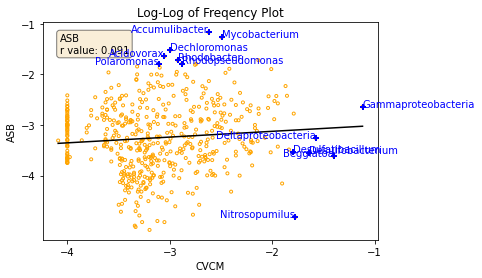

['Gammaproteobacteria', 0.0023070278022416972, 0.0762558639562158, 0.0739488361539741]
['Accumulibacter', 0.06852985480463354, 0.0023944487881157155, 0.06613540601651782]
['Mycobacterium', 0.05442059011785994, 0.0032170315350534273, 0.051203558582806515]
['Beggiatoa', 0.00024243343006607665, 0.039826035965598125, 0.03958360253553205]
['Dechloromonas', 0.030507510022185966, 0.0010099035704977848, 0.029497606451688183]
['Deltaproteobacteria', 0.0005510397566762437, 0.026599556945530362, 0.02604851718885412]
['Desulfobacterium', 0.00027431673476459295, 0.02283685170706281, 0.022562534972298216]
['Acidovorax', 0.022923494506446443, 0.000887737816002085, 0.022035756690444358]
['Rhodobacter', 0.019194351000293566, 0.0011972243940578577, 0.01799712660623571]
['Nitrosopumilus', 1.5039294669111454e-05, 0.016761141516810008, 0.016746102222140898]
['Desulfatibacillum', 0.00028694974228664653, 0.015832681782642688, 0.015545732040356041]
['Polaromonas', 0.015929620913522853, 0.0007900052124055251, 

In [2]:
"""PROGRAM TO COMBINE METAGENOMES INTO A SINGLE DATASET WITH GENERA, AVERAGED 
GENUS FREQUENCIES, STD ERRORS NORMALIZED BY FREQUENCY, AND LOG10 OF FREQUENCIES.
FREQUENCY AND NORMALIZED STD ERORS ARE MULTIPLIED BY 1000 TO AVOID EXCEL'S 
LOW-NUMBER PROBLEM.  sOO, THOSE VALUES HAVE TO BE DIVIED BY 1000 WHEN USED BY
OTHER PROGRAMS. 
"""
seektaxa = ['Alteromonas', 'Saccharophagus', 'Pseudoalteromonas' , 'Photobacterium', 'Marinobacter', 'Aliivibrio' , 'Prochlorococcus', 
            'Synechococcus','Gammaproteobacteria', 'Deltaproteobacteria', 'Escherichia', 'Salmonella', 'Proteus', 'Klebsiella', 
            'Bacteroides', 'Prevotella', 'Shigella', 'Vibrio', 'Maribacter' ]
Wilcoxonlabels = True
FINDtaxalabels = False 
numprocess = 410
import math
from scipy import stats
from matplotlib import pyplot as plt
import numpy as np
from google.colab import drive
drive.mount('/content/gdrive')
#sample = ['A.Z.USA.1.23_organism_genus_hits.csv.xls' , 'ANR'] # Anaerobic sludge pond
sample = ['A.Z.USA.4.14_organism_genus_hits.csv.xls' , 'ASB']  # Activated sludge aeration basin
#sample = ['A.K.Pri.4663797.3_organism_genus_hits.csv', 'PRI']  # Primary effluent
#sample = ['A.Z.USA.6.12_organism_genus_hits.csv.xls' , 'FOM']   # Foamy ASB effluent
#sample = ['A.a.Denmark.4487554.3_organism_genus_hits.csv', 'DEN'] # Denmark ASB

cvcmfile = '/content/gdrive/Shared drives/4.Venetian Canals/Joined MG Files/CVCM.All6.Joined.csv'
newfile = '/content/gdrive/Shared drives/4.Venetian Canals/Joined MG Files/' + sample[0]
outfile = '/content/gdrive/Shared drives/4.Venetian Canals/Joined MG Files/Plotted.' +sample[0]+ 'vs.CVCM.csv'

nummetas = 2
mglabel = [sample[1], 'CVCM']
  
stringmetas =[]
with open(newfile, 'r') as f:
  data = f.read()
  print(repr(data)[:100])
  print(repr(data)[-100:])
  stringmetas.append(str(data))
  f.close()
with open(cvcmfile, 'r') as f:
  data = f.read()
  print(repr(data)[:100])
  print(repr(data)[-100:])
  stringmetas.append(str(data))
  f.close()

cleanmetas =[]            # gets rid of unwanted test, converts number from string to integer
for x in range(nummetas):
  datastring = stringmetas[x].replace('unclassified (derived from ', '').replace(')', '').replace('Candidatus ', '')
  metalines = datastring.split('\n')
  metalines.pop()
  integermeta =[]
  for y in range(len(metalines)):
    row = metalines[y].split(',')
    if len(row) > 1:
      integermeta.append([row[0], int(row[1])])
  cleanmetas.append(integermeta)

for a in range(nummetas):
  cleanmetas[a].sort(key = lambda x: x[1])
  cleanmetas[a].reverse()

totalslist =[]             # counts the total number of taxa in each metagenome
for x in range(nummetas):
  count =0
  for y in range(len(cleanmetas[x])):
    count += cleanmetas[x][y][1]
  totalslist.append(count)
print('Total counts for each metagenone: ', totalslist)

for x in range(nummetas):
  for y in range(len(cleanmetas[x])):
    cleanmetas[x][y].append(cleanmetas[x][y][1] / totalslist[x])

### Above: cleanmetas is a list of all mgs with their taxa, numbers, and frqs.  mgs are not trimmed to numprocess
### Below: make taxonset and taxonlist that are the union of the 'numprocess' genera

taxonset = set()
taxonlist =[]
for x in range(nummetas):
  for y in range(numprocess):
    if cleanmetas[x][y][0] not in taxonset:
      taxonset.add(cleanmetas[x][y][0])
      taxonlist.append([cleanmetas[x][y][0], 0.0001, 0.0001])

### routine for plotting each mg against a cvcm made using all other mgs.
deviantslist, tags = [], []
x1, y1, = [], []
for a in range(len(taxonlist)):
  for b in range(len(cleanmetas[0])):
    if taxonlist[a][0] == cleanmetas[0][b][0]:                # cleanmetas[0] is the new dataset
      taxonlist[a][1] = cleanmetas[0][b][2]
  for c in range(len(cleanmetas[1])):                         #cleanmetas[1] is CVCM
    if taxonlist[a][0] == cleanmetas[1][c][0]:
      taxonlist[a][2] = cleanmetas[1][c][2]

for d in range(len(taxonlist)):
  x1.append(math.log(taxonlist[d][2], 10))
  y1.append(math.log(taxonlist[d][1], 10))

slope, intercept, r_value, p_value, std_err = stats.linregress(x1,y1)
for m in range(len(taxonlist)):
    taxonlist[m].append(abs(taxonlist[m][1] - taxonlist[m][2]))
taxonlist.sort(key = lambda x: x[3])
taxonlist.reverse()
x2, y2, deviants = [], [], []
for m in range(round(len(taxonlist) / 40)):
  x2.append(math.log(taxonlist[m][2], 10))
  y2.append(math.log(taxonlist[m][1], 10))  
  tags.append(taxonlist[m][0][:])                        
  deviants.append(taxonlist[m])
x4 = [min(x1), max(x1)]
y4 = [min(x1) * slope + intercept, max(x1) * slope + intercept]
fig, ax = plt.subplots()
textstr = mglabel[0] +'\n' + 'r value: ' + str(r_value)[:5] 
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
# place a text box in upper left in axes coords
ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=10,
      verticalalignment='top', bbox=props)
plt.scatter(x1, y1, marker = '.', facecolors= 'none', edgecolors = 'orange')       # scatter allows plotting with open circles
#plt.scatter(x2, y2, marker = '+', color = 'b')       # scatter allows plotting with open circles

if Wilcoxonlabels == True: 
  for p in range(len(tags)):
    if p % 2 == 1: ha = 'right'   
    else: ha = 'left'
    plt.text(x2[p], y2[p], tags[p], color = 'b', horizontalalignment=ha)
    plt.scatter(x2, y2, marker = '+', color = 'b')  

x5, y5, plttaxa = [], [], []
if FINDtaxalabels == True:
  for e in range(len(seektaxa)):
    for f in range(len(taxonlist)):
      if seektaxa[e].lower() == taxonlist[f][0].lower():
        x5.append(math.log(taxonlist[f][2], 10))
        y5.append(math.log(taxonlist[f][1], 10))
        plttaxa.append(seektaxa[e])    
  for q in range(len(x5)):
    if q % 2 == 0: ha = 'right'
    else: ha = 'left'
    plt.text(x5[q], y5[q], plttaxa[q], color = 'k', horizontalalignment=ha)

plt.plot(x4,y4, marker = '', color = 'k')                                    # plot allows plotting with connected lines
plt.title('Log-Log of Freqency Plot')
plt.xlabel('CVCM' )
plt.ylabel(mglabel[0])
plt.xticks(np.arange(-4, 0, step=1))
plt.yticks(np.arange(-4, 0, step=1))

plt.show()
deviantslist.append(deviants)
for x in range(len(deviants)):
  print(deviants[x])
"""
for w in range(len(outfiles)):
  with open(outfiles[w], 'w') as g:
    for x in range(len(deviantslist[w])):
      outline = deviantslist[w][x][0] + ',' + str(deviantslist[w][x][1]) + ','\
        + str(deviantslist[w][x][2]) + ',' +  str(deviantslist[w][x][3]) +'\n'
      g.write(outline)
  g.close()
"""
print('Done!')
